In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.integrate import odeint
np.set_printoptions(precision=3)
from itertools import cycle

#### Goals:
1. Write rhsf to propagate shock either direction based on sign of speed
2. Extend rhsf to 2 waves

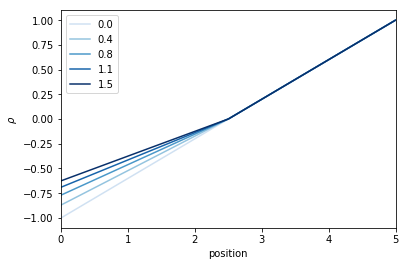

In [11]:
def get_ρb(ρ): 
    '''applies 2 boundary cells on the ends of the ρ array'''
    ρb = np.zeros(ngrd+2)
    ρb[1:-1] = ρ[:]
    ρb[-1] = ρ[-1]
    ρb[0]  = ρ[0]
    return ρb

def get_ρf(ρ): 
    '''applies 2 boundary cells on the ends of the ρ array'''
    ρf = np.zeros(ngrdf)
    ρf[1:-1] = ρ[:]
    ρf[-1]   = ρ[-1]
    return ρf

def get_c(ρ):
    '''computes a wave speed based on concentration'''
    c = (ρ)**1
    return c

def rhsf(ρ,t):
    '''returns derivative using a flux splitting upwinding scheme'''
    ρbc = get_ρb(ρ)
    c   = get_c(ρ)
    
    # split speeds based on sign
    i_pos        = np.where(c>=0)[0]
    cpos,cneg    = [np.zeros_like(c) for i in range(2)]
    cpos[i_pos]  = c[i_pos]
    cneg[~i_pos] = c[~i_pos]
    
    # designate Qi-1, Qi, and Qi+1
    Ql = ρbc[0:-2]
    Qi = ρbc[1:-1]
    Qr = ρbc[2:]
    dρdt = -1/Δx*(cneg*(Qr-Qi))#+(cpos*(Qi-Ql)))
    # I may have added too many cells. Try just doing the interface like before.
    return dρdt #,c,cneg,cpos,ρbc,Qi,Qr,Qr-Qi

ngrd = 600
L    = 5
tend = 1.5
ntimes = 5

times = np.linspace(0,tend,ntimes)
ngrdf = ngrd+1
Δx    = L/ngrd
xf    = np.linspace(0,L,ngrdf)
x     = (xf[1:] + xf[:-1])/2

ρ0  = np.linspace(-1,1,ngrd)
# rhsf(ρ0,1)

ρall = odeint(rhsf, ρ0, times)

blue = iter(plt.cm.Blues(np.linspace(0.2,1,ntimes)))
for j in range(ntimes):
    plt.plot(x,ρall[j,:],label=round(times[j],1),c=next(blue))
    
plt.xlabel('position')
plt.ylabel(r'$\rho$')
plt.xlim([0,L]);
plt.legend(loc=0)
plt.show()

In [120]:
def get_ρf(ρ): 
    '''applies 2 boundary cells on the ends of the ρ array'''
    ρf = np.zeros(ngrdf)
    ρf[:-1] = ρ[:]
    ρf[-1]   = 1
    return ρf

def get_c(ρ):
    '''computes a wave speed based on concentration'''
    c = (1-ρ)**2
    return c

def rhsf(ρ,t):
    '''returns derivative using a flux splitting upwinding scheme'''
    ρf  = get_ρf(ρ)
    cf  = get_c(ρf)
    qf  = ρf*cf
    qf[0]  = 0
    qf[-1] = 0
    
    # split speeds based on sign
    i_pos        = qf>=0
#     cpos,cneg    = [np.zeros_like(c) for i in range(2)]
#     cpos[i_pos]  = c[i_pos]
#     cneg[~i_pos] = c[~i_pos]
    
    # designate Qi-1, Qi, and Qi+1
    Qup   = qf[i_pos] #[:-1]
    Qdown = qf[~i_pos] #[1:]
    dρdt = -1/Δx*((Qup[1:]-Qup[:-1]))#+(Qr[i_pos]-Ql[i_pos]))
    return dρdt,Qup,Qdown

ngrd = 5
L    = 5
tend = .1
ntimes = 10

times = np.linspace(0,tend,ntimes)
ngrdf = ngrd+1
Δx    = L/ngrd
xf    = np.linspace(0,L,ngrdf)
x     = (xf[1:] + xf[:-1])/2

ρ0  = np.zeros(ngrd)*0.5 #np.linspace(-1,1,ngrd)
rhsf(ρ0,1)

# ρall = odeint(rhsf, ρ0, times)

# blue = iter(plt.cm.Blues(np.linspace(0.2,1,ntimes)))
# for j in range(ntimes):
#     plt.plot(x,ρall[j,:],label=round(times[j],1),c=next(blue))
    
# plt.xlabel('position')
# plt.ylabel(r'$\rho$')
# plt.xlim([0,L]);
# # plt.legend(loc=0)
# plt.show()

(array([-0., -0., -0., -0., -0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([], dtype=float64))

In [107]:
test = np.array([0,1,2,3,4])
i = test>=2
print(i)
print(~i)
print(test[~i])
print(test[i])
test[:-1]

[False False  True  True  True]
[ True  True False False False]
[0 1]
[2 3 4]


array([0, 1, 2, 3])

The current code only handles positive speeds, and even then it has oscillations.  How should I set my boundary conditions? I'm not sure if I can set both, since there are characteristics going in both directions.  

Oscillations begin at the wall, meaning that there's something up with boundary conditions.  
I also need it to move at a constant pace and stack up at the wall.  
The waves pass right through the wall because the wall is downwind of them so they can't see it!  
I can manage a source, but cannot get a wall.